In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import cv2
import imutils
#from skimage import feature
import matplotlib.patches as mpatches
from matplotlib.colors import BoundaryNorm

In [165]:
image = cv2.imread('HOG/test/20171118_133018.jpg', 0)  ### <----- GUT!!!
# image = cv2.imread('../images/test/10/DSC_0043.JPG', 0)
# image = cv2.imread('../images/test/10/20171118_131748.jpg', 0)

# image = image[:, 80:-1]

#image = image[170:220, 210:280]

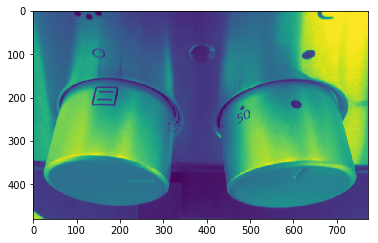

In [101]:
plt.imshow(image)

In [3]:
import time
# import os
#from sklearn import svm
import sys
sys.path.insert(0, '../scripts')
from timeit import default_timer as timer
from helper import*
from sklearn.externals import joblib

%load_ext autoreload
%autoreload 2

from classify_lib import *

In [39]:
%load_ext autoreload
%autoreload 2

from classify_lib import *


data = '..\images\train_icons'
clf = trainOneClassSVM(data, '../scripts/models/Classifier_32_HOG44.pkl')

# joblib.dump(clf, '../scripts/models/Classifier_nu20.pkl')
# clf = joblib.load('../Classifier.pkl')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


50


In [180]:
start = timer() 
# from skimage.filters import threshold_adaptive
# image = threshold_adaptive(image, 5, offset=10)
# image = image.astype(np.uint8)
# #print(type(image[0,0]))
# image[image==1] = 255
# image[image==0] = 0
# print(image[0:5,0:5])
heatmaps = classifyAndCreateHeatmap(image, clf, stepSize=8, winSize=(32,32), showSlidingWindow=False)
        
duration = timer() - start
print(duration)
        
# time.sleep(2)
cv2.destroyAllWindows()

C:\Users\alici\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
C:\Users\alici\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in 

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]
(480, 853)


C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\sit

29.68638839594496


C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
C:\Users\alici\Anaconda3\lib\sit

In [181]:
bestlevel, gmax = getBestLevel(heatmaps, 3)
top3 = getTopNvalues(heatmaps, bestlevel, 3)

cmap, norm = defineCenteredCmap('bwr', -0.2, gmax[bestlevel])

h0 = heatmaps[bestlevel]
x, y = h0.shape
imgres = cv2.resize(image, (y, x), interpolation = cv2.INTER_AREA)

fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].imshow(imgres)

cax = ax[1].imshow(h0, norm=norm, cmap=cmap, vmin=-0.2, vmax=np.max(top3))
cbar = fig.colorbar(cax, orientation='horizontal')
    
    
for val in top3:
    ind= np.argwhere(h0==val)
    (y, x, h, w) = cv2.boundingRect(ind) 

    rect = mpatches.Rectangle((x, y), w, h, fill=False, edgecolor='green', linewidth=2)
    ax[1].add_patch(rect)

Bestes Level: 0 -0.117925114301


ValueError: kth(=-2) out of bounds (1)

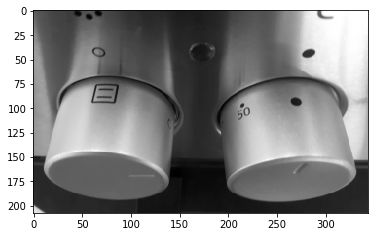

In [109]:
# imageCut = image[170:220, 210:280]
x, y = h0.shape
imgres = cv2.resize(image, (y, x), interpolation = cv2.INTER_AREA)
plt.imshow(imgres, cmap='gray')